# Librerias

In [20]:
from drawdata import draw_scatter

In [21]:
draw_scatter()

Deprecated. Use drawdata.ScatterWidget() instead.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [23]:
df = pd.read_csv('C:/Users/zubel/OneDrive/Documentos/GitHub/Fz-Dataworks/Python/Aprendizaje No Supervisado/puntos_kmeans.csv')

In [24]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [25]:
df

,X,Y
0,-2.508043,7.864081
1,0.466618,3.865713
2,-2.940626,8.564806
3,-2.899947,1.850140
4,2.344388,1.310534
...,...,...
995,-0.995924,7.444662
996,-1.161673,9.254715
997,-1.135518,8.492728
998,-1.229334,7.753426


# KMeans

<Axes: xlabel='X', ylabel='Y'>

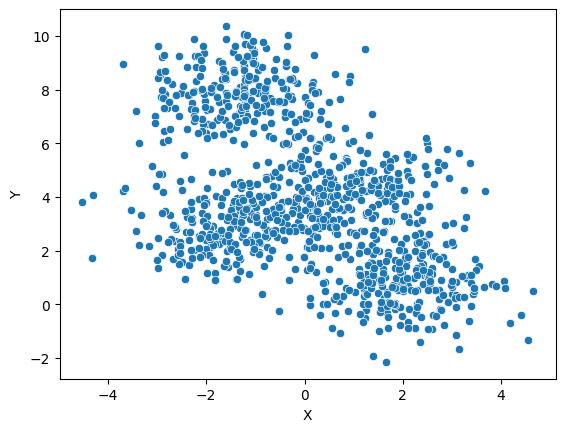

In [26]:
sns.scatterplot(x = df.X, y = df.Y)

In [27]:
km = KMeans(n_clusters = 3, random_state = 0)

In [28]:
km.fit(df)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [29]:
labels = km.labels_
labels

array([1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 0, 0, 1, 0, 2, 0, 1,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1,
       2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0,
       0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 2, 2, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 0, 2,
       1, 0, 0, 0, 1, 2, 2, 0, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2,

In [30]:
print(len(labels)-len(df))

0


In [31]:
centers = km.cluster_centers_

In [32]:
centers

array([[-0.3664333 ,  3.56572277],
       [-1.24462913,  7.80109803],
       [ 1.99906807,  0.9586071 ]])

<Axes: xlabel='X', ylabel='Y'>

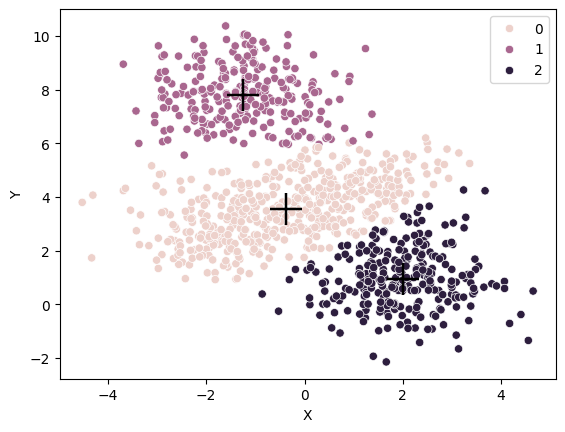

In [33]:
sns.scatterplot(x = df.X, y = df.Y, hue = labels)
sns.scatterplot(x = centers[:,0], y = centers[:, 1], color = 'black', marker = "+", s = 500)

# KMEANS VS DBSCAN

In [34]:
df = pd.read_csv('C:/Users/zubel/OneDrive/Documentos/GitHub/FZ-Dataworks/Python/Aprendizaje No Supervisado/puntos_dbscan.csv')

In [35]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

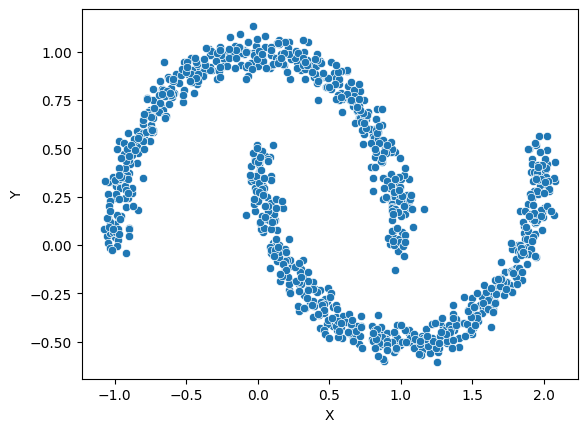

In [36]:
sns.scatterplot(x = df.X, y = df.Y)
plt.show()

In [37]:
km = KMeans(n_clusters = 2, random_state = 42)

In [38]:
km.fit(df)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [39]:
labels = km.labels_

In [40]:
centers = km.cluster_centers_

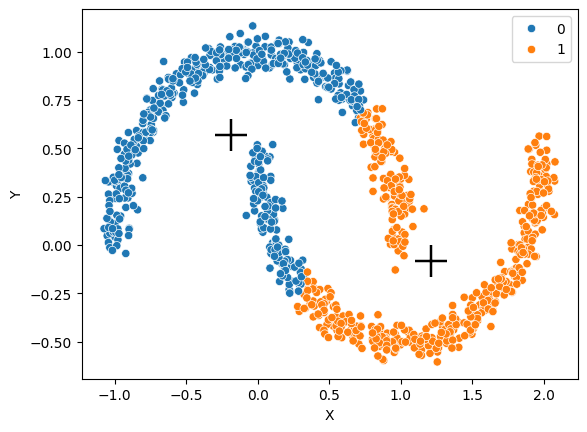

In [41]:
sns.scatterplot(x = df.X, y = df.Y, hue = labels)
sns.scatterplot(x = centers[:,0], y = centers[:, 1], color = 'black', marker = "+", s = 500)
plt.show()

In [42]:
ds = DBSCAN(eps = 0.09, min_samples = 2)

In [43]:
ds.fit(df)

,eps,0.09
,min_samples,2
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [44]:
labels = ds.labels_

<Axes: xlabel='X', ylabel='Y'>

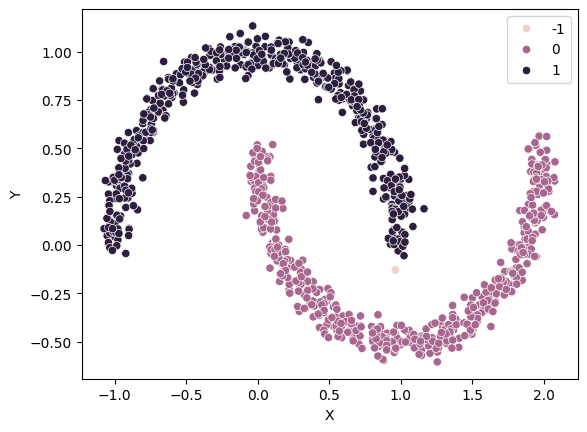

In [45]:
sns.scatterplot(x = df.X, y=df.Y, hue = labels)

# Evaluacion de modelos

## Codo

In [46]:
def codo(data, max_cluster = 10):
  suma_de_cuadrados = [] #distorsion
  for i in range(1,max_cluster+1):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    suma_de_cuadrados.append(kmeans.inertia_)
  return suma_de_cuadrados

In [47]:
from sklearn.datasets import make_blobs
data, _ = make_blobs(n_samples = 500, centers = 4, n_features = 2, random_state = 1)

In [48]:
data

array([[-6.92324165e+00, -1.06695320e+01],
       [-8.63062033e+00, -7.13940564e+00],
       [-9.63048069e+00, -2.72044935e+00],
       [-2.30647659e+00,  5.30797676e+00],
       [-7.57005366e+00, -3.01446491e+00],
       [-1.00051011e+00,  2.77905153e+00],
       [-4.81826839e+00, -2.77214822e+00],
       [-5.33964799e+00, -1.27625764e+00],
       [-7.94308840e+00, -3.89993901e+00],
       [-5.54924525e+00, -3.41298968e+00],
       [-5.14508990e+00, -9.54492198e+00],
       [-7.09669936e+00, -8.04074036e+00],
       [-5.82641512e+00, -1.96346196e+00],
       [-1.83198811e+00,  3.52863145e+00],
       [-7.34267235e+00, -3.16546482e+00],
       [-7.34072825e+00, -6.92427252e+00],
       [-7.94653906e+00, -3.36768655e+00],
       [-8.24598536e+00, -8.61315821e+00],
       [-1.98197711e+00,  4.02243551e+00],
       [-4.35098035e+00, -3.69476678e+00],
       [-1.04768696e+01, -3.60318139e+00],
       [-1.10195984e+01, -3.15882031e+00],
       [-5.17255904e+00, -4.31835971e+00],
       [-2.

In [49]:
nc = 10
d = codo(data, nc)

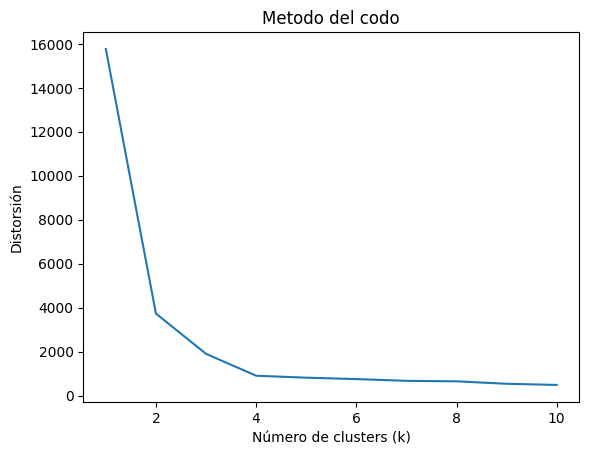

In [50]:
plt.plot(range(1, nc + 1), d)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distorsión')
plt.title('Metodo del codo')
plt.show()

## Silueta

In [51]:
from sklearn.metrics import silhouette_score

In [52]:
def silhouette(data, max_cluster = 10):
  scores = []
  for i in range(2, max_cluster + 1):
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    scores.append(silhouette_avg)
  print(scores)
  best_k = 2 + scores.index(max(scores))
  return best_k

In [53]:
print("la mejor partición es con", silhouette(data), "clusters")

[0.7049787496083262, 0.5882004012129721, 0.6505186632729437, 0.5737098048695828, 0.4603058272227307, 0.38142181721844376, 0.35509151254502924, 0.33790179416064975, 0.32928938542056485]
la mejor partición es con 2 clusters


In [54]:
df = pd.DataFrame(data)

<Axes: xlabel='0', ylabel='1'>

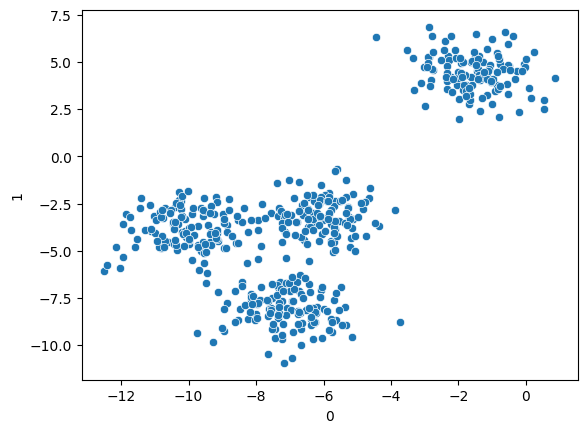

In [55]:
sns.scatterplot(x = df[0], y = df[1])

In [56]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [57]:
X = preprocessing.normalize(df)

In [58]:
model = KMeans()

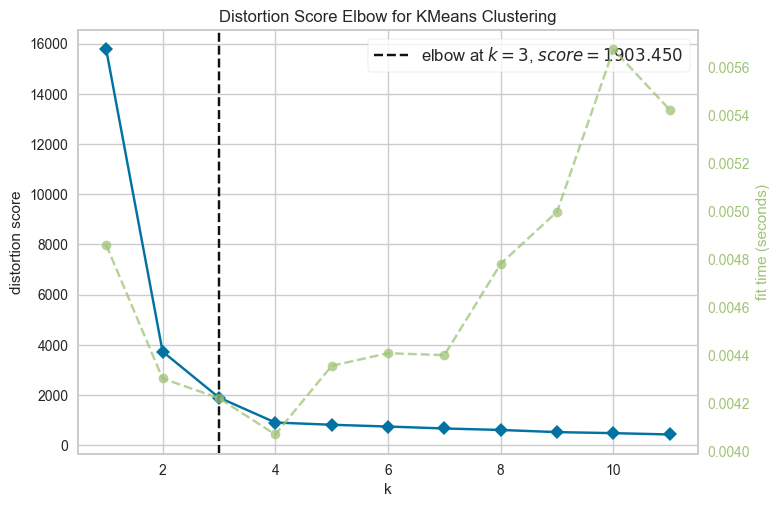

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
visualizador = KElbowVisualizer(model, k = (1,12))
visualizador.fit(df) # o df
visualizador.show()

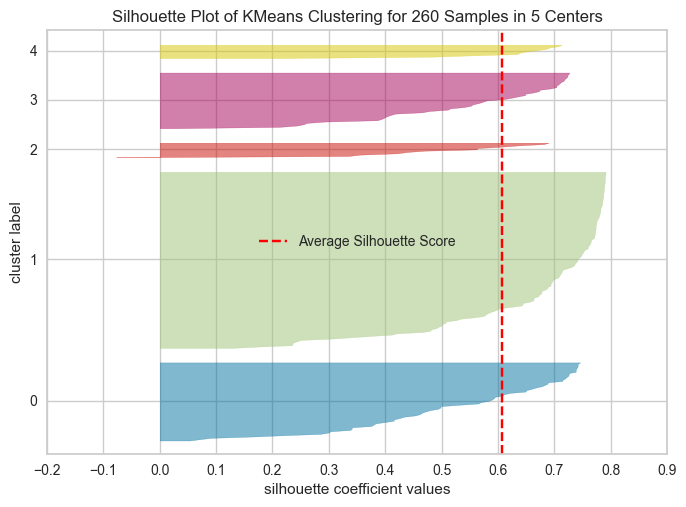

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 260 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [60]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Load a clustering dataset
X, y = load_nfl()

# Specify the features to use for clustering
features = ['Rec', 'Yds', 'TD', 'Fmb', 'Ctch_Rate']
X = X.query('Tgt >= 20')[features]

# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure